In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df_esta = pd.read_csv("./Datos/df_esta.csv", index_col = 0)
df_esta.head(15)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197,0,1
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563,0,1
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563,0,1
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563,0,1
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563,0,1
5,-0.780403,-0.583683,0.552155,1.533659,-0.673565,0.024563,0,1
6,-0.805644,-0.610777,0.552155,2.467921,-0.673565,0.024563,0,1
7,-0.814058,-0.646903,0.424068,0.065534,-0.751558,0.024563,0,1
8,-0.822471,-0.683028,0.360025,0.065534,-0.751558,0.024563,0,1
9,-0.847712,-0.719154,0.295981,0.065534,-0.751558,0.024563,0,1


In [3]:
df_sin_esta = pd.read_csv("./Datos/df_sin_esta.csv", index_col = 0)
df_sin_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,2.6,-0.2,82,13,12.9,99.93,0,1
1,3.9,-0.9,71,32,25.0,101.14,0,1
2,3.7,-1.5,69,33,25.0,101.14,0,1
3,2.9,-2.3,69,32,25.0,101.14,0,1
4,2.6,-2.3,70,32,25.0,101.14,0,1


# Realización del modelo con variables codificadas (no pq de momento no tenemos) y estandarizadas

Vamos a usar de variable respuesta (y) "Weather Mainly Clear":

0 es despejado/clear

1 es nuboso/cloudy

In [4]:
# separamos los datos en X e y

X1 = df_esta.drop(["Weather_Mainly Clear", "Weather_Mostly Cloudy"], axis = 1)
y1 = df_esta["Weather_Mainly Clear"]

In [5]:
X1.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.782197
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,0.024563
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,0.024563
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,0.024563
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,0.024563


In [6]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Weather_Mainly Clear, dtype: int64

Train-test split

In [7]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Ajuste y predicción del modelo

In [8]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [9]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.sample(10)

,Real,Predicted,Set
1138,1,1,Test
3137,1,1,Train
2717,1,1,Train
194,0,0,Test
3640,0,0,Test
2889,1,1,Train
1956,0,1,Train
196,0,1,Test
4103,1,1,Train
2970,1,0,Train


# Realización del modelo con variables sin estandarizar

In [10]:
df_sin_esta

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,Weather_Mostly Cloudy
0,2.6,-0.2,82,13,12.9,99.93,0,1
1,3.9,-0.9,71,32,25.0,101.14,0,1
2,3.7,-1.5,69,33,25.0,101.14,0,1
3,2.9,-2.3,69,32,25.0,101.14,0,1
4,2.6,-2.3,70,32,25.0,101.14,0,1
...,...,...,...,...,...,...,...,...
4170,-13.4,-16.5,77,26,25.0,101.47,1,0
4171,-13.8,-16.5,80,20,25.0,101.50,1,0
4172,-13.7,-16.3,81,19,25.0,101.54,1,0
4173,-12.1,-15.1,78,28,25.0,101.52,0,1


In [11]:
# separamos los datos en X e y

X2 = df_sin_esta.drop(["Weather_Mainly Clear", "Weather_Mostly Cloudy"], axis = 1)
y2 = df_sin_esta["Weather_Mainly Clear"]

In [12]:
X2

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,2.6,-0.2,82,13,12.9,99.93
1,3.9,-0.9,71,32,25.0,101.14
2,3.7,-1.5,69,33,25.0,101.14
3,2.9,-2.3,69,32,25.0,101.14
4,2.6,-2.3,70,32,25.0,101.14
...,...,...,...,...,...,...
4170,-13.4,-16.5,77,26,25.0,101.47
4171,-13.8,-16.5,80,20,25.0,101.50
4172,-13.7,-16.3,81,19,25.0,101.54
4173,-12.1,-15.1,78,28,25.0,101.52


In [13]:
y2

0       0
1       0
2       0
3       0
4       0
       ..
4170    1
4171    1
4172    1
4173    0
4174    0
Name: Weather_Mainly Clear, Length: 4175, dtype: int64

In [14]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [15]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

In [16]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.sample(10)

,Real,Predicted,Set
215,0,1,Train
3939,0,1,Train
3504,1,1,Train
133,1,1,Train
3445,0,1,Train
1357,1,1,Train
3208,1,1,Test
2980,0,1,Test
3246,1,1,Train
3990,0,1,Train


# Matriz de confusión

Vamos a usar de variable respuesta (y) "Weather Mainly Clear":

0 es despejado/clear

1 es nuboso/cloudy

Verdaderos positivos. Predecimos sol y hace sol.  Real 0, predicho 0

Verdaderos negativos. Predecimos nubes y hacen nubes. Real 1, predicho 1

Falsos positivos. Predecimos sol y está nublado. Real 1, predicho 0

Falsos negativos. Predecimos nublado y hace sol. Real 0, predicho 1

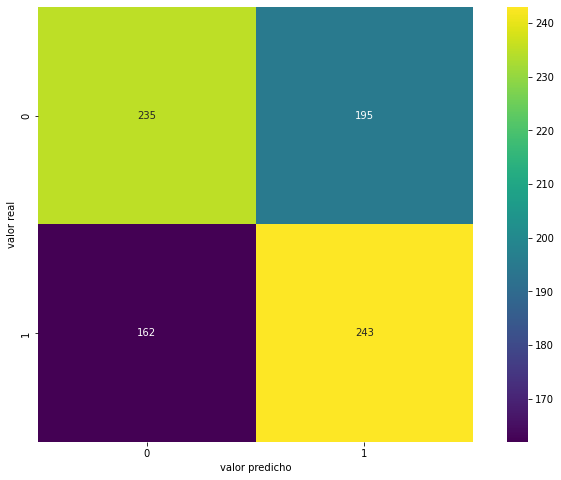

In [17]:
# MATRIZ DE CORRELACIÓN PARA DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

preferimos predecir nuboso y que haga sol, nos interesan los falsos negativos

In [18]:
# MATRIZ DE CORRELACIÓN PARA DATOS SIN ESTANDARIZAR

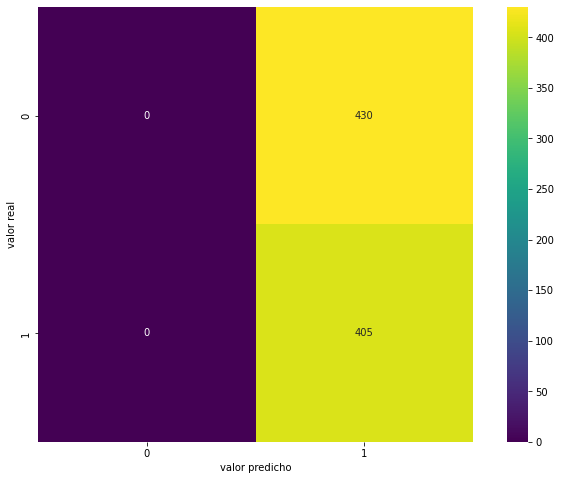

In [20]:
# MATRIZ DE CORRELACIÓN PARA DATOS ESTANDARIZADOS

mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()